In [126]:
import pandas as pd
import numpy as np

from textblob import TextBlob

import matplotlib.pyplot as plt
% matplotlib inline


# Trust Pilot

In [68]:
df_trust=pd.read_csv('../Data/Trust Pilot Extraction/www.tesco.com.csv', sep = '\t', header=None, names=['title', 'review', 'rating', 'language','datetime']) 

In [80]:
df_trust.head()

,title,review,rating,language,datetime
0,Ordered online shop with Tesco gave 3 …,Ordered online shop with Tesco gave 3 telephon...,1,en,2017-07-31
1,terrible customer service,terrible customer servicebought a rechargeable...,1,en,2017-07-29
2,The customer service team are rude to …,The customer service team are rude to anyone t...,1,en,2017-07-29
3,Avoid Tescos Online Groceries If You Live In C...,UPDATE FRI 28th 2017: I genuinely want to than...,1,en,2017-07-28
4,Still no sofa! 😤,Still no sofa!Order placed 11/06/17!Tracking s...,1,en,2017-07-27


In [70]:
df_trust['datetime']=df_trust['datetime'].apply(lambda x: x[:10])

df_trust['datetime']=pd.to_datetime(df_trust['datetime'])

df_trust=df_trust.drop_duplicates('review')

In [85]:
df_trust_2=df_trust.index=df_trust['datetime']
df_trust_2=df_trust['rating']

In [87]:
df_trust_2=df_trust_2.resample('q').mean()

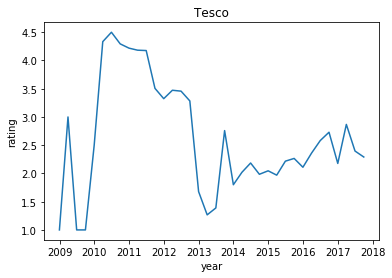

In [99]:
plt.plot(df_trust_2.index, df_trust_2)

plt.xlabel('year')
plt.ylabel('rating')
plt.title('Tesco')

# AWS

In [106]:
df_aws=pd.read_csv('../Data/Rank_Reach/Web Traffic data 0-250.csv')

In [112]:
df_aws['date']=pd.to_datetime(df_aws['date'])

df_aws=df_aws.loc[df_aws['site']=='https://www.tesco.com/']

/Users/IzzIbrahim/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


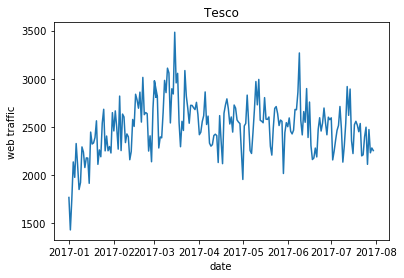

In [115]:
plt.plot(df_aws.date, df_aws['Alexa Rank'])

plt.xlabel('date')
plt.ylabel('web traffic')
plt.title('Tesco')

# Twitter

In [161]:
df_twitter=pd.read_csv('../Data/Tweets/tesco_tweets.csv')

In [162]:
#df_twitter['date']=df_twitter['created_at'].apply(lambda x: x[:10])

In [163]:
df_twitter['datetime']=pd.to_datetime(df_twitter['created_at'])

In [164]:
def sentiment_score(row):
    try:
        return TextBlob(row).sentiment.polarity
    except:
        return np.nan

In [192]:
df_twitter['sentiment']=df_twitter.text.apply(sentiment_score, 1)

df_twitter_2=df_twitter.index=df_twitter.datetime

df_twitter_2=df_twitter['sentiment']

df_twitter_2=df_twitter_2.resample('h').mean()

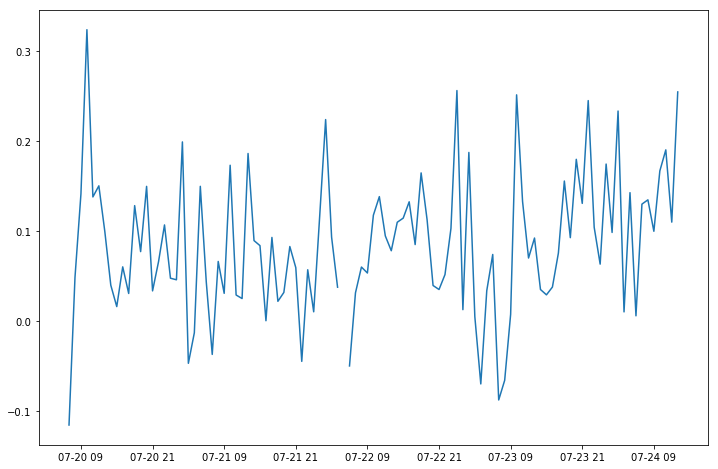

In [193]:
plt.figure(figsize=(12,8))
plt.plot(df_twitter_2.index,df_twitter_2)

